In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import re
from nltk.corpus import stopwords
warnings.filterwarnings('ignore')

In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/m

In [2]:
sms_spam_original_dataset = pd.read_csv('spam.csv',encoding='latin-1')
sms_spam_dataset = sms_spam_original_dataset.copy()
sms_spam_dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Check percentage of null values in the dataset

In [3]:
sms_spam_dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
Unnamed_2 = (sms_spam_dataset['Unnamed: 2'].isnull().sum() / len(sms_spam_dataset['Unnamed: 2']))*100
Unnamed_3 = (sms_spam_dataset['Unnamed: 3'].isnull().sum() / len(sms_spam_dataset['Unnamed: 3']))*100
Unnamed_4 = (sms_spam_dataset['Unnamed: 4'].isnull().sum() / len(sms_spam_dataset['Unnamed: 4']))*100

print("volume of NaNs of Unnamed_2 is " + str(round(Unnamed_2,2))+"%")
print("volume of NaNs of Unnamed_3 is " + str(round(Unnamed_3,2))+"%")
print("volume of NaNs of Unnamed_4 is " + str(round(Unnamed_4,2))+"%")

volume of NaNs of Unnamed_2 is 99.1%
volume of NaNs of Unnamed_3 is 99.78%
volume of NaNs of Unnamed_4 is 99.89%


### Show Not null unamed 2, 3, and 4

In [5]:
show_null_sms_spam_dataset = sms_spam_dataset.copy()
show_null_sms_spam_dataset = show_null_sms_spam_dataset.dropna(subset=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
show_null_sms_spam_dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""
5048,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""


### Drop Unamed 2, 3, and 4

In [6]:
clean_sms_spam_dataset = sms_spam_dataset.copy()
clean_sms_spam_dataset.dropna(how="any", inplace=True, axis=1)
clean_sms_spam_dataset.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
clean_sms_spam_dataset.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Show percentile of ham and spam in the message

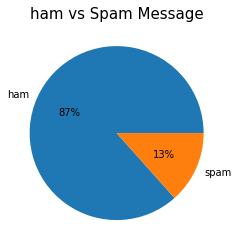

In [7]:
ham_spam_dataset = [len(clean_sms_spam_dataset[clean_sms_spam_dataset['label']=='ham']),
                    len(clean_sms_spam_dataset[clean_sms_spam_dataset['label']=='spam'])]
ham_spam_labels = ['ham', 'spam']
plt.title('ham vs Spam Message', fontsize=15)
plt.pie(ham_spam_dataset, labels = ham_spam_labels, autopct='%.0f%%')
plt.show()

In [8]:
clean_sms_spam_dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
clean_sms_spam_dataset['length'] = clean_sms_spam_dataset['message'].apply(len)
clean_sms_spam_dataset.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Text(0.5, 1.0, 'ham vs. spam length')

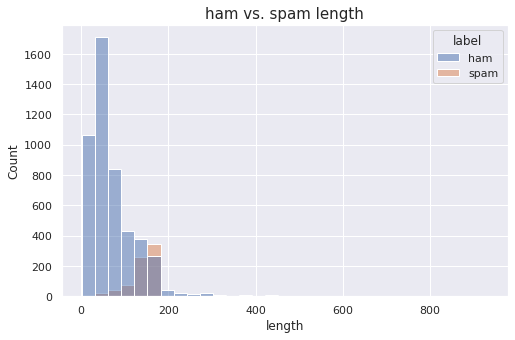

In [10]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.histplot(clean_sms_spam_dataset, x="length", hue="label", binwidth=30).set_title("ham vs. spam length", fontsize=15)

### Cleaning word(message) dataset

In [11]:
clean_sms_spam_dataset['message']=clean_sms_spam_dataset['message'].str.replace(r'[1234567890#&-./?!,":;()\']',' ')
clean_sms_spam_dataset['message']

0       Go until jurong point  crazy   Available only ...
1                           Ok lar    Joking wif u oni   
2       Free entry in   a wkly comp to win FA Cup fina...
3       U dun say so early hor    U c already then say   
4       Nah I don t think he goes to usf  he lives aro...
                              ...                        
5567    This is the  nd time we have tried   contact u...
5568                Will Ì_ b going to esplanade fr home 
5569    Pity    was in mood for that  So   any other s...
5570    The guy did some bitching but I acted like i d...
5571                           Rofl  Its true to its name
Name: message, Length: 5572, dtype: object

### Ham vs. Spam message using Wordcloud

In [12]:
ham_wordcloud = WordCloud(    background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(list(clean_sms_spam_dataset[clean_sms_spam_dataset['label']=='ham']['message'])))
spam_wordcloud = WordCloud(    background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(list(clean_sms_spam_dataset[clean_sms_spam_dataset['label']=='spam']['message'])))

Text(0.5, 1.0, 'Spam')

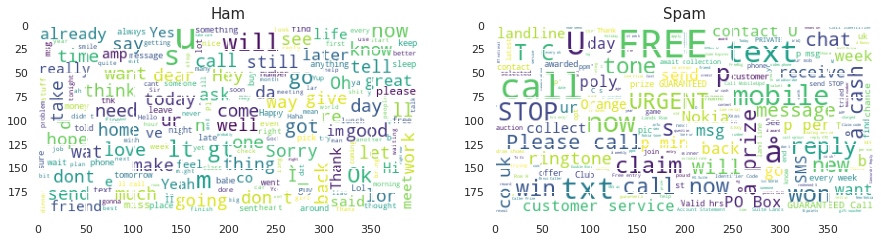

In [13]:
fig, axs = plt.subplots(ncols=2,figsize = (15,8))
axs[0].set_title("Ham", fontsize=15)
axs[0].imshow(ham_wordcloud)

axs[1].imshow(spam_wordcloud)
axs[1].set_title("Spam", fontsize=15)

In [14]:
ham_dataset=str(list(clean_sms_spam_dataset[clean_sms_spam_dataset['label']=='ham']['message'])).lower().split()
ham_data=[word for word in ham_dataset if not word in str(set(STOPWORDS))]

spam_dataset=str(list(clean_sms_spam_dataset[clean_sms_spam_dataset['label']=='spam']['message'])).lower().split()
spam_data=[word for word in spam_dataset if not word in str(set(STOPWORDS))]

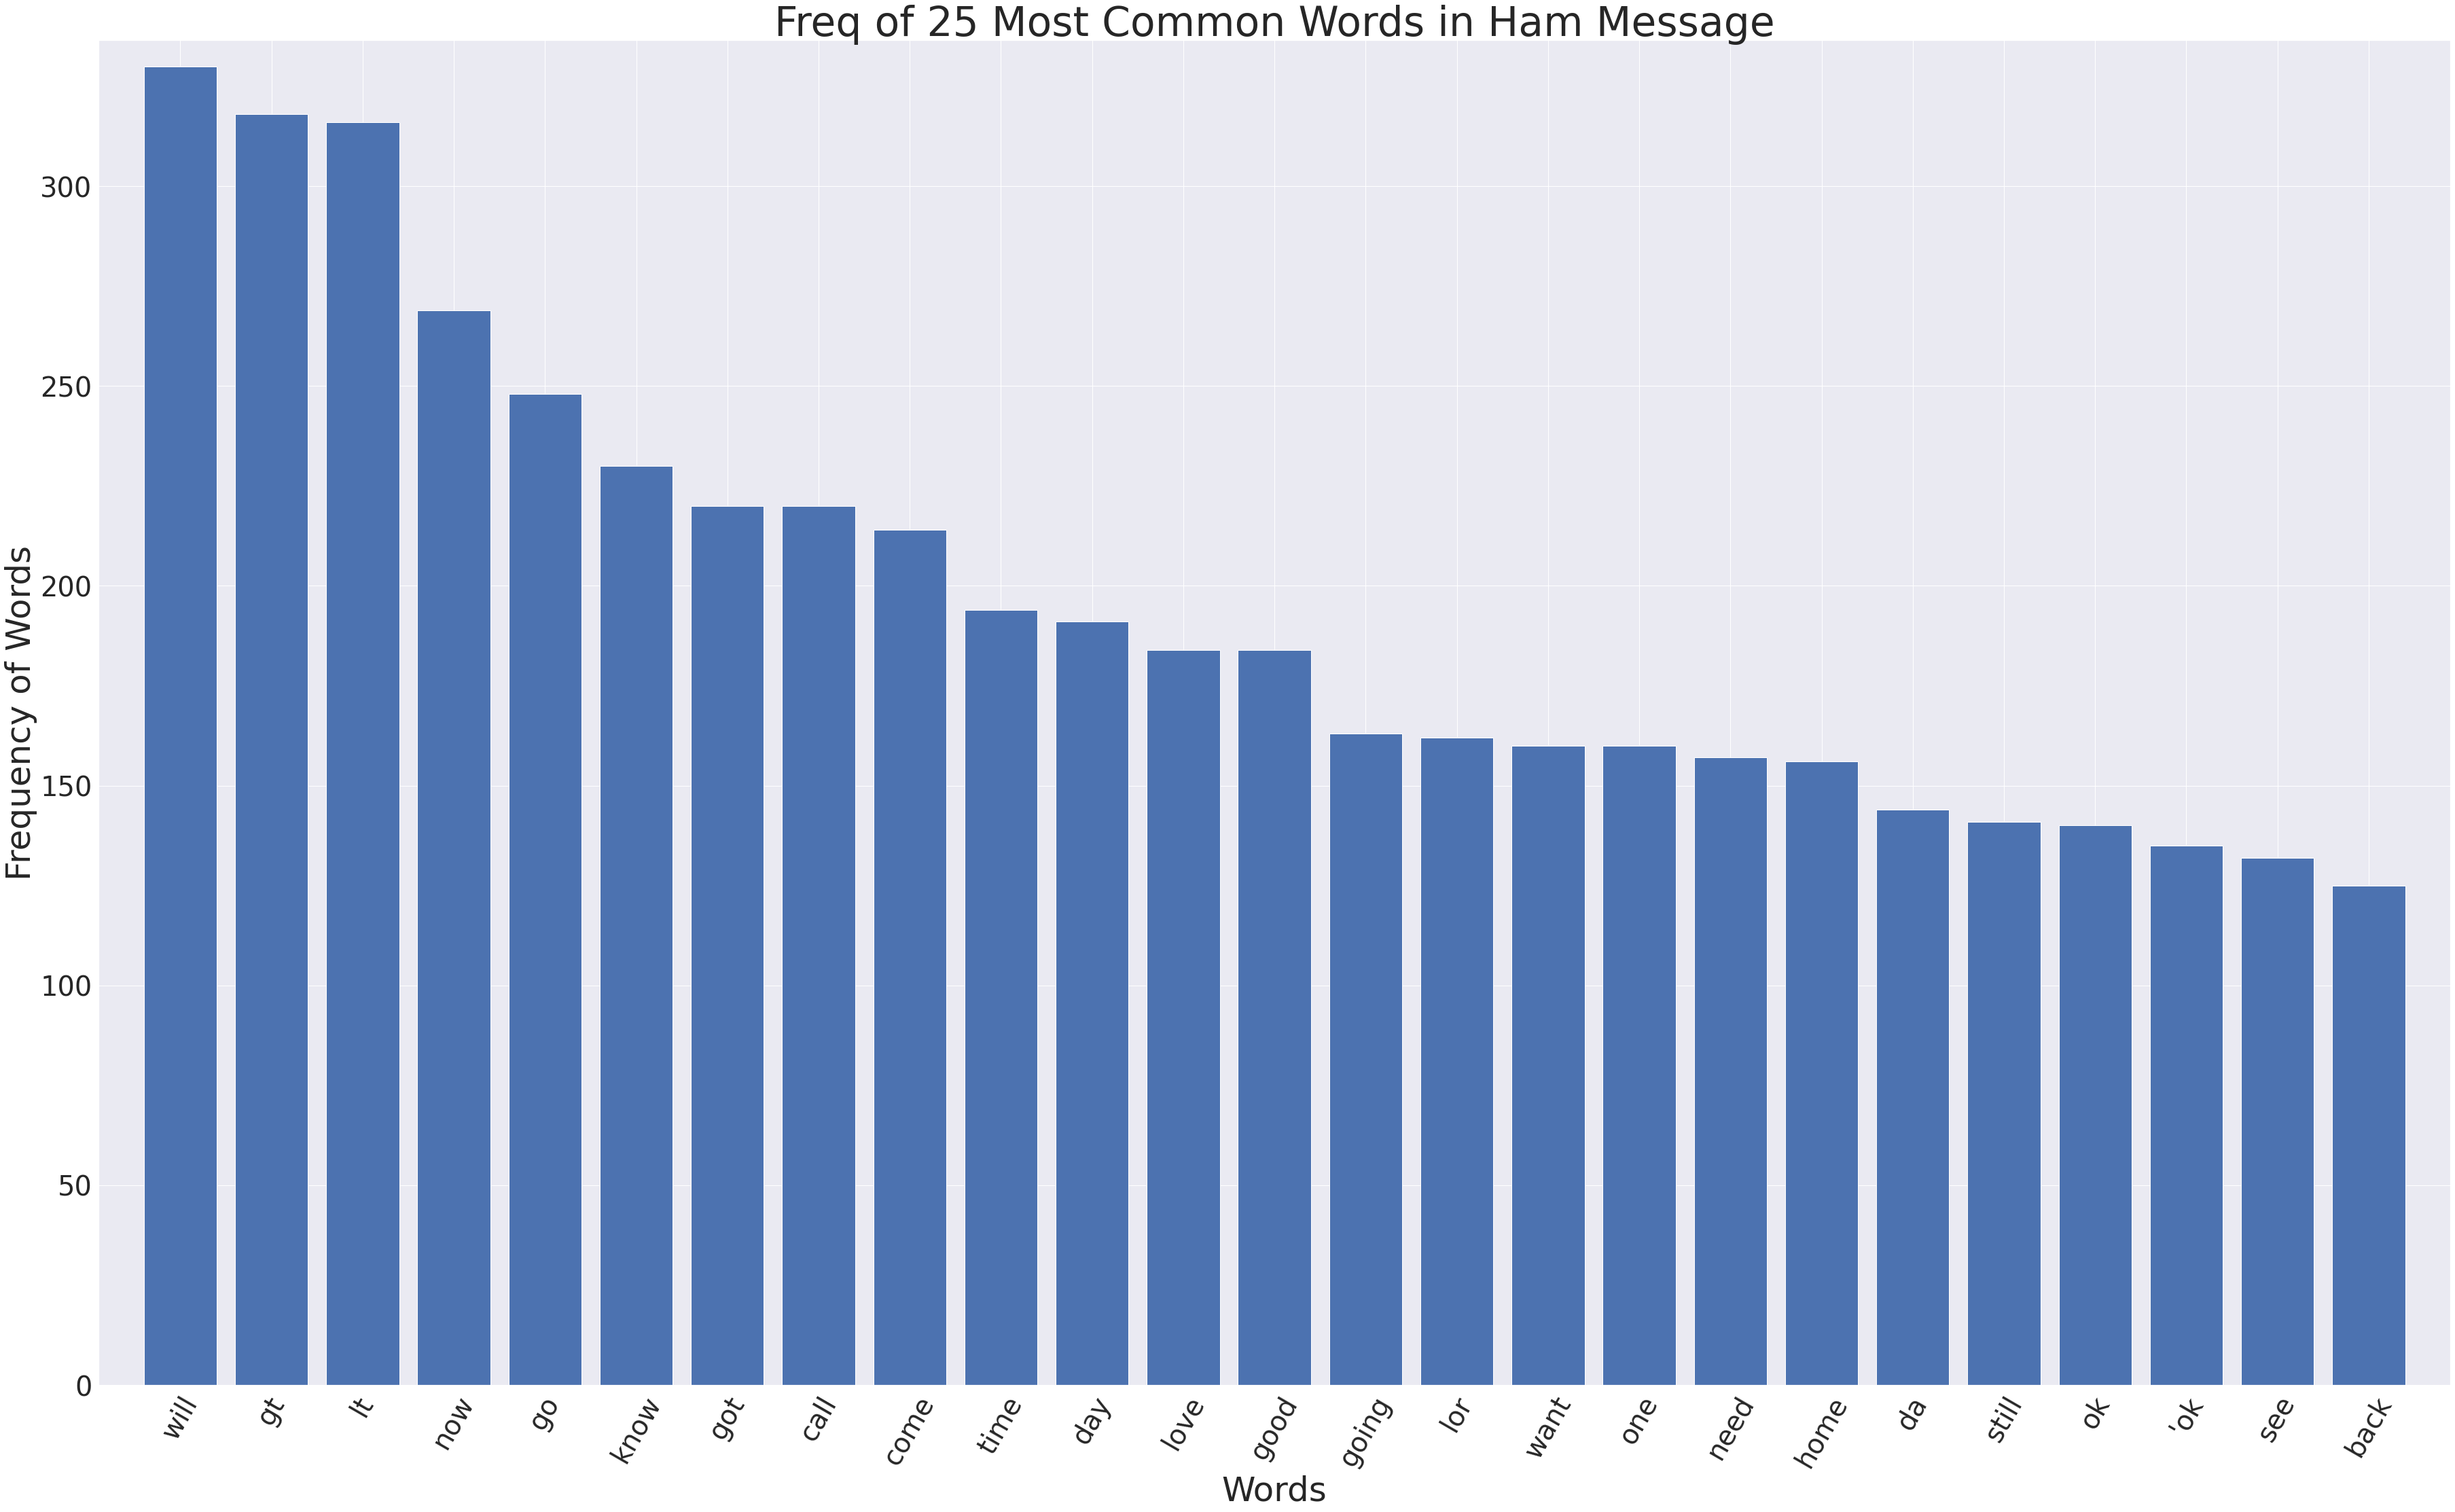

In [15]:
x,y = zip(*Counter(ham_data).most_common(25))
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.tight_layout(pad=0)
plt.title('Freq of 25 Most Common Words in Ham Message', fontsize=60)
plt.show()

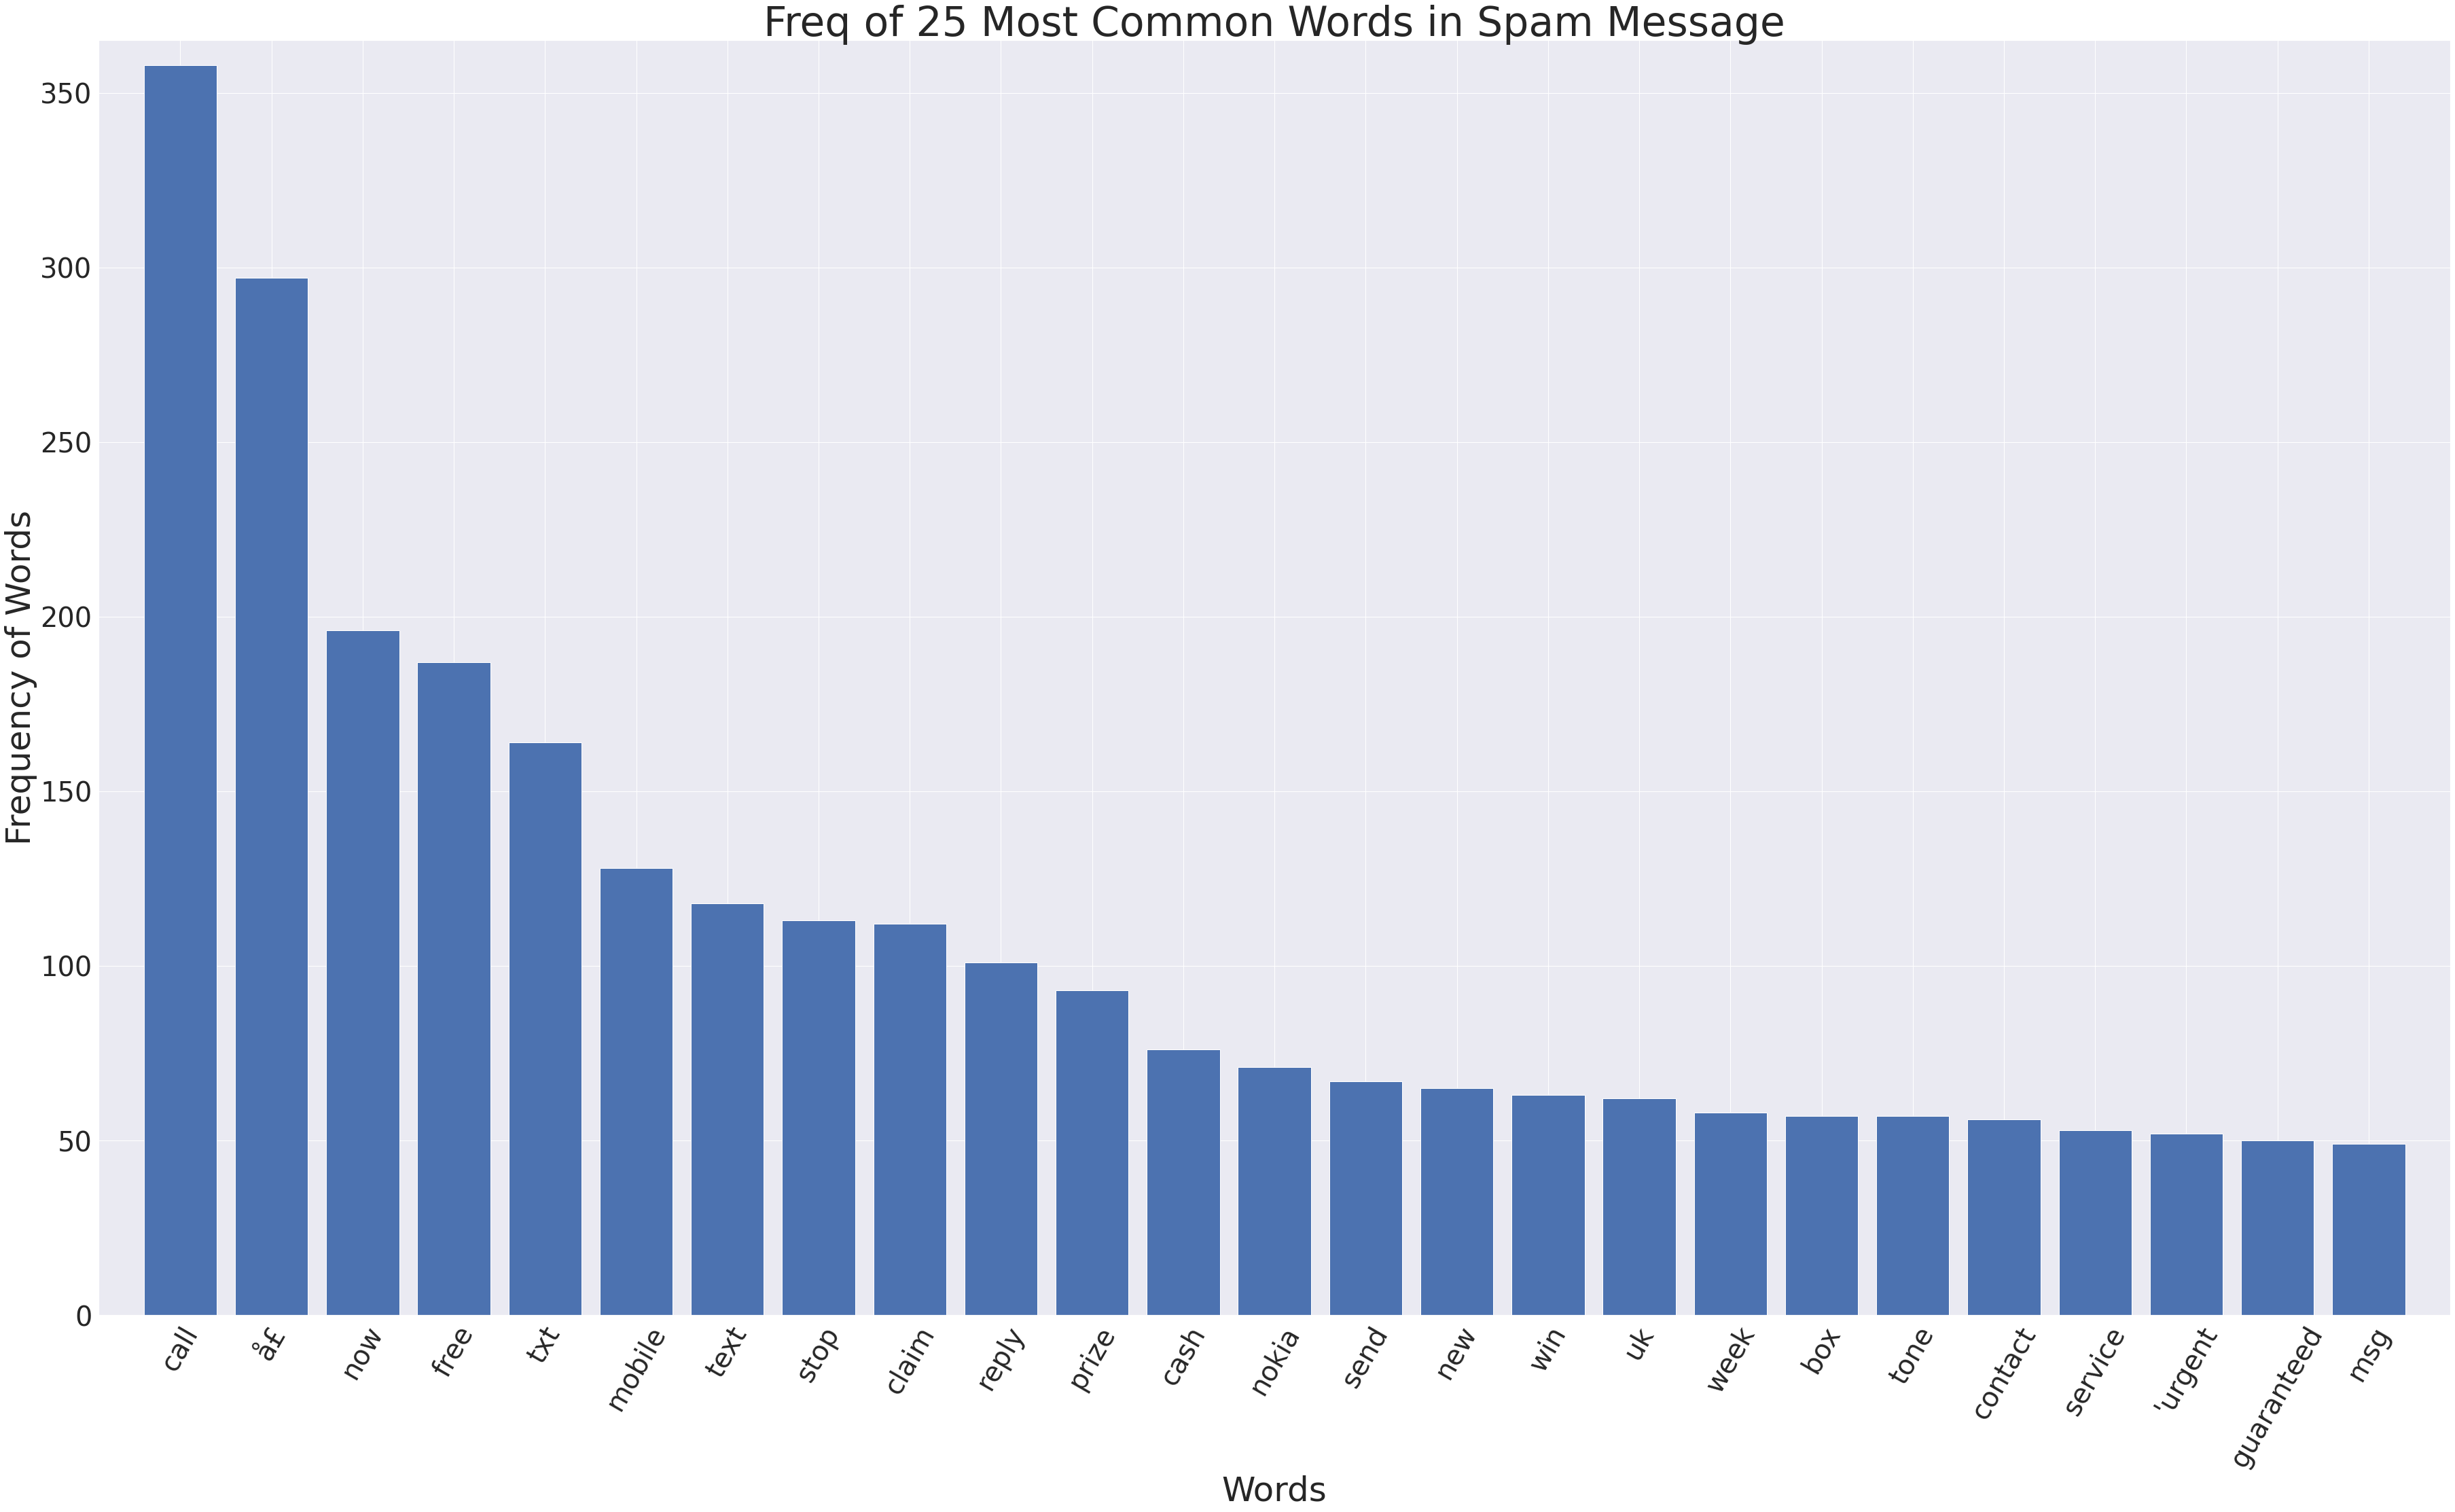

In [16]:
x,y = zip(*Counter(spam_data).most_common(25))
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.tight_layout(pad=0)
plt.title('Freq of 25 Most Common Words in Spam Message', fontsize=60)
plt.show()

####  In Ham message, we can see the messages are the vocabulary that we commonly uses for example: "will", "go", "know", etc.
####  In Spam message, we can see a lot of "call", "free", "text", "now", "REPLY", "claim", etc. 

I think the spam messages seem to be related to products and money.

In [17]:
clean_sms_spam_dataset['label'] = clean_sms_spam_dataset.label.map({'ham':0, 'spam':1})
clean_sms_spam_dataset.head()

,label,message,length
0,0,Go until jurong point crazy Available only ...,111
1,0,Ok lar Joking wif u oni,29
2,1,Free entry in a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor U c already then say,49
4,0,Nah I don t think he goes to usf he lives aro...,61


In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

In [19]:
clean_sms_spam_dataset['clean_message'] = clean_sms_spam_dataset['message'].apply(clean_text)
clean_sms_spam_dataset.head()

,label,message,length,clean_message
0,0,Go until jurong point crazy Available only ...,111,go jurong point crazy available bugis n great ...
1,0,Ok lar Joking wif u oni,29,ok lar joking wif u oni
2,1,Free entry in a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor U c already then say,49,u dun say early hor u c already say
4,0,Nah I don t think he goes to usf he lives aro...,61,nah don t think goes usf lives around though


In [20]:
X = clean_sms_spam_dataset.clean_message
y = clean_sms_spam_dataset.label
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### CountVectorizer

In [22]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
countvect = CountVectorizer()
countvect.fit(X_train)

CountVectorizer()

In [24]:
X_train_ctvt = countvect.transform(X_train)
X_train_ctvt = countvect.fit_transform(X_train)
X_train_ctvt

<3900x6268 sparse matrix of type '<class 'numpy.int64'>'
	with 31964 stored elements in Compressed Sparse Row format>

In [25]:
X_test_ctvt = countvect.transform(X_test)
X_test_ctvt

<1672x6268 sparse matrix of type '<class 'numpy.int64'>'
	with 12311 stored elements in Compressed Sparse Row format>

### LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train_ctvt,y_train)

LogisticRegression()

In [27]:
pred_log = model_log.predict(X_test_ctvt)
log_score =model_log.score(X_train_ctvt,y_train)
log_pred_score =round(log_score*100,2)
print("Logistic Regression score is " + str(log_pred_score) +"%")
log_pred_accuracy = metrics.accuracy_score(y_test, pred_log)
log_pred_accuracy_score =round(log_pred_accuracy*100,2)
print("Logistic Regression Accuracy of class prediction is " + str(log_pred_accuracy_score) +"%")

Logistic Regression score is 99.62%
Logistic Regression Accuracy of class prediction is 97.79%


<AxesSubplot:>

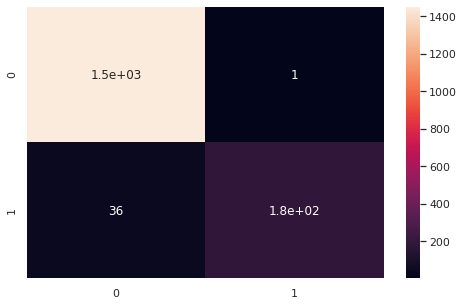

In [28]:
log_cf_matrix = metrics.confusion_matrix(y_test, pred_log)
plt.figure(figsize=(8,5))
sns.heatmap(log_cf_matrix, annot=True)

In [29]:
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.99      0.84      0.91       219

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



### SVC

In [30]:
from sklearn.svm import SVC
model_svm = SVC(kernel='linear')
model_svm.fit(X_train_ctvt,y_train)

SVC(kernel='linear')

In [31]:
pred_svm = model_svm.predict(X_test_ctvt)
svm_score =model_svm.score(X_train_ctvt,y_train)
svm_pred_score =round(svm_score*100,2)
print("SVC score is " + str(svm_pred_score) +"%")
svm_pred_accuracy = metrics.accuracy_score(y_test, pred_svm)
svm_pred_accuracy_score =round(svm_pred_accuracy*100,2)
print("SVC Accuracy of class prediction is " + str(svm_pred_accuracy_score) +"%")

SVC score is 99.97%
SVC Accuracy of class prediction is 97.91%


<AxesSubplot:>

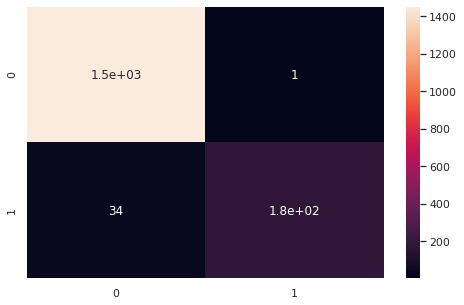

In [32]:
svm_cf_matrix = metrics.confusion_matrix(y_test, pred_svm)
plt.figure(figsize=(8,5))
sns.heatmap(svm_cf_matrix, annot=True)

In [33]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.99      0.84      0.91       219

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



### MultinomialNB

In [34]:
from sklearn.naive_bayes import MultinomialNB
model_NB = MultinomialNB()
model_NB.fit(X_train_ctvt,y_train)

MultinomialNB()

In [35]:
pred_NB = model_NB.predict(X_test_ctvt)
NB_score =model_NB.score(X_train_ctvt,y_train)
NB_pred_score =round(NB_score*100,2)
print("MultinomialNB score is " + str(NB_pred_score) +"%")
NB_pred_accuracy = metrics.accuracy_score(y_test, pred_NB)
NB_pred_accuracy_score =round(NB_pred_accuracy*100,2)
print("MultinomialNB Accuracy of class prediction is " + str(NB_pred_accuracy_score) +"%")

MultinomialNB score is 99.44%
MultinomialNB Accuracy of class prediction is 98.27%


<AxesSubplot:>

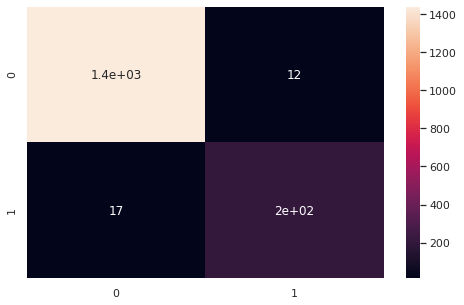

In [36]:
NB_cf_matrix = metrics.confusion_matrix(y_test, pred_NB)
plt.figure(figsize=(8,5))
sns.heatmap(NB_cf_matrix, annot=True)

In [37]:
print(classification_report(y_test,pred_NB))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1453
           1       0.94      0.92      0.93       219

    accuracy                           0.98      1672
   macro avg       0.97      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672



### Let's try with my actual spam message and normal message

In [38]:
sms=["Amazon: Congratulations James, you came 3rd in today's Amazon pods raffle! Click the link to : b2gxv.info/5spfY15YPt",
     "May I ask also who this is? I hope I'm texting back the right person I called while ago. Thank you.",
     "Final Notice: Dongjun We tried to give your FREE $1000 bonus voucher. Please fill in you details here ki1q.pw/06srYg9ka Enjoy your weekend."
    ]

In [39]:
message=[]

for i in range(len(sms)):
    review=re.sub('[^a-zA-Z]',' ',sms[i])
    review=review.lower()
    message.append(review)

In [40]:
predict_sms_using_log =model_log.predict(countvect.transform(message))
predict_sms_using_svm =model_svm.predict(countvect.transform(message))
predict_sms_using_NB =model_NB.predict(countvect.transform(message))

#### 0 is potential ham message and 1 is potential spam message. 

In [41]:
print(predict_sms_using_log)
print(predict_sms_using_svm)
print(predict_sms_using_NB)

[0 0 1]
[0 0 1]
[1 0 1]


#### It seems MultinomialNB is more accurate result than Logistic Regression and SVC. 